# EDA Loan Data Analysis


 ## Data Loading

In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("."))
df = pd.read_csv('loan_5000.csv')

['loan_data_analysis.ipynb', '.ipynb_checkpoints', '.git', 'loan_5000.csv']


In [32]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Columns: 145 entries, id to settlement_term
dtypes: float64(66), int64(54), object(25)
memory usage: 5.5+ MB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
features = df.drop(['loan_status'])
target = df.loan_status

KeyError: "['loan_status'] not found in axis"

## Data Cleaning

Text(0.5, 1.0, 'Columns where NA values are more than 40%')

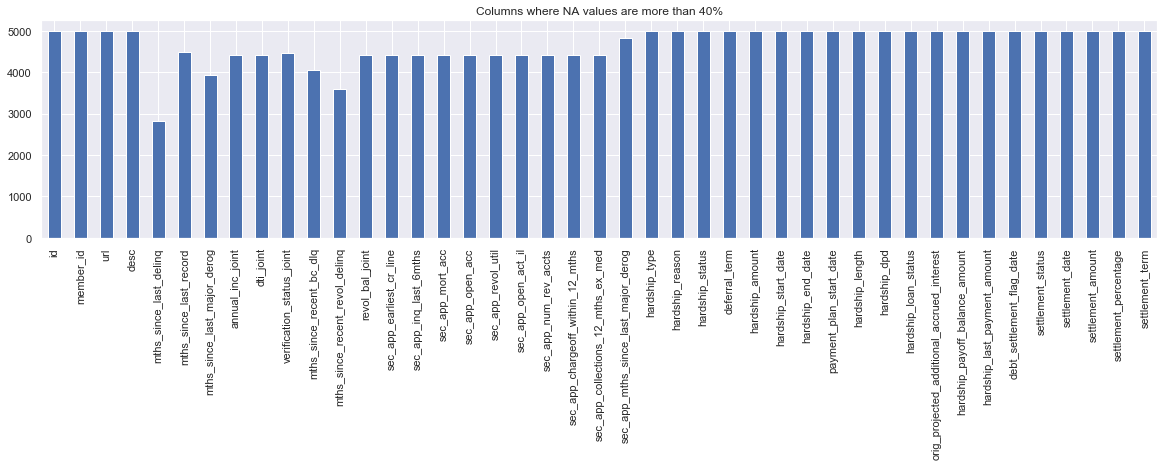

In [33]:
NA_col = df.isnull().sum()
NA_col = NA_col[NA_col.values >(0.4*len(df))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('Columns where NA values are more than 40%')

In [34]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df


In [35]:
df = removeNulls(df, axis =1,percent = 0.3) #Drop columns with certain missing values

Number of Columns dropped	:  43

Old dataset rows,columns (4999, 145) 
New dataset rows,columns (4999, 102)


In [36]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1,0,60124,16901,36500,18124,N,Cash,N
1,30000,30000,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1,0,372872,99468,15000,94072,N,Cash,N


In [37]:
df = removeNulls(df, axis =0,percent = 0.3) #Drop rows with certain missing values


Number of Rows dropped	:  0

Old dataset rows,columns (4999, 102) 
New dataset rows,columns (4999, 102)


In [38]:
unique = df.nunique()
unique = unique[unique.values == 1]
df.drop(labels = list(unique.index), axis =1, inplace=True) #Drop columns with no unique values (every value is same = analysis is useless)
print("rows,columns",df.shape) 

rows,columns (4999, 91)


In [39]:
print(df.emp_length.unique())
df.emp_length.fillna('0',inplace=True) #
df.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(df.emp_length.unique())

['10+ years' '6 years' '4 years' '< 1 year' '2 years' '9 years' nan
 '5 years' '3 years' '7 years' '1 year' '8 years']
['10+ years' '6 years' '4 years' '< 1 year' '2 years' '9 years' '0'
 '5 years' '3 years' '7 years' '1 year' '8 years']


In [40]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
df.tail(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
4996,5000,5000,5000,36 months,20.89,188.10,D,D4,Care Manager,1 year,...,1,2,87.5,50.0,0,7500,5329,6000,0,Cash
4997,16000,16000,16000,60 months,10.33,342.56,B,B1,Road foreman,10+ years,...,0,1,100.0,0.0,0,99598,62789,11800,77698,Cash
4998,3500,3500,3500,36 months,8.19,109.99,A,A4,NaN,< 1 year,...,0,0,81.8,0.0,0,217350,12566,28600,6000,Cash


In [41]:
(df.purpose.value_counts()*100)/len(df)
del_loan_purpose = (df.purpose.value_counts()*100)/len(df)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.75) | (del_loan_purpose.index == 'other')]
df.drop(labels = df[df.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print("rows,columns",df.shape) 
print(df.purpose.unique())

rows,columns (4659, 91)
['debt_consolidation' 'credit_card' 'car' 'vacation' 'home_improvement'
 'small_business' 'major_purchase' 'medical']


In [42]:
(df.loan_status.value_counts()*100)/len(df)
del_loan_status = (df.loan_status.value_counts()*100)/len(df)
del_loan_status = del_loan_status[(del_loan_status < 1.5)]
df.drop(labels = df[df.loan_status.isin(del_loan_status.index)].index, inplace=True)
print("rows,columns",df.shape) 
print(df.loan_status.unique())

rows,columns (4653, 91)
['Current' 'Fully Paid']


In [43]:
df['loan_income_ratio']= df['loan_amnt']/df['annual_inc']

In [44]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins, labels=slot)

In [45]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
df['annual_inc_range'] = pd.cut(df['annual_inc'], bins, labels=slot)

In [46]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
df['int_rate_range'] = pd.cut(df['int_rate'], bins, labels=slot)

In [47]:
def loansstatus_to_numeric(x):
    print(x)
    if x== 'Current':
        return 0
    if x=='Fully Paid':
        return 1
    
df['loan_status'] = df['loan_status'].apply(loansstatus_to_numeric)
df.loan_status



Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Fully Paid
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Curre

Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current
Current


0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
27      0
28      0
29      0
30      0
31      0
       ..
4967    0
4968    0
4969    0
4970    0
4971    0
4972    0
4973    0
4974    0
4975    0
4976    0
4977    1
4978    0
4979    0
4980    0
4981    0
4982    0
4983    0
4984    0
4986    0
4987    0
4988    0
4989    0
4990    0
4991    0
4992    0
4993    0
4994    0
4995    0
4997    0
4998    0
Name: loan_status, Length: 4653, dtype: int64

In [48]:
#df[df.loan_status == 'Current'] = 0
#df[df.loan_status == 'Fully Paid'] = 1
df.loan_status

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
27      0
28      0
29      0
30      0
31      0
       ..
4967    0
4968    0
4969    0
4970    0
4971    0
4972    0
4973    0
4974    0
4975    0
4976    0
4977    1
4978    0
4979    0
4980    0
4981    0
4982    0
4983    0
4984    0
4986    0
4987    0
4988    0
4989    0
4990    0
4991    0
4992    0
4993    0
4994    0
4995    0
4997    0
4998    0
Name: loan_status, Length: 4653, dtype: int64

## Visualizations

In [49]:
def univariate(df,col,vartype,hue =None):

    sns.set(style="darkgrid")
    
    if vartype == 0: # continuous variable --> produces distribution, violin, or boxplot
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1: # categorical variable --> produces countplot
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

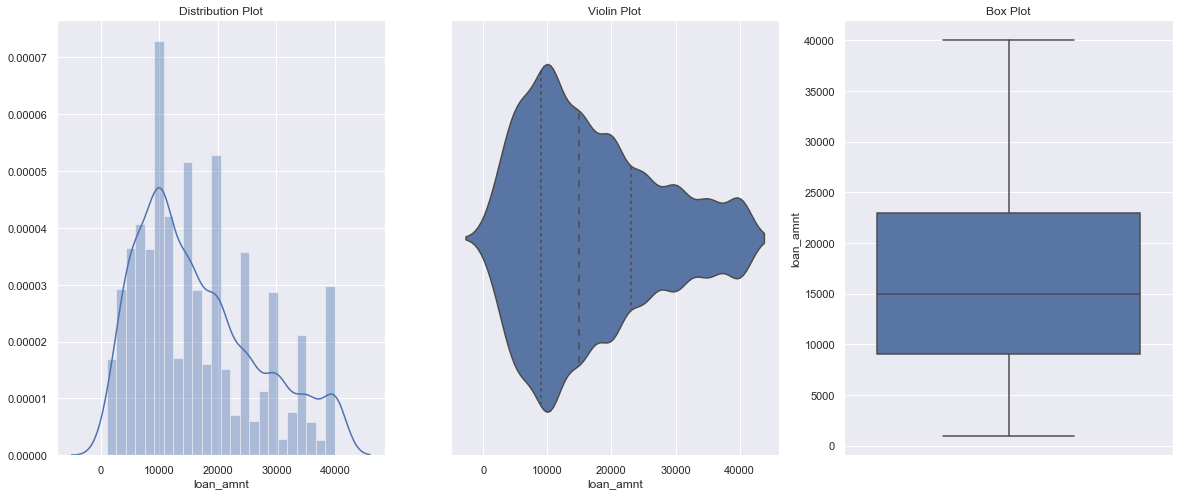

In [50]:
univariate(df=df,col='loan_amnt',vartype=0)

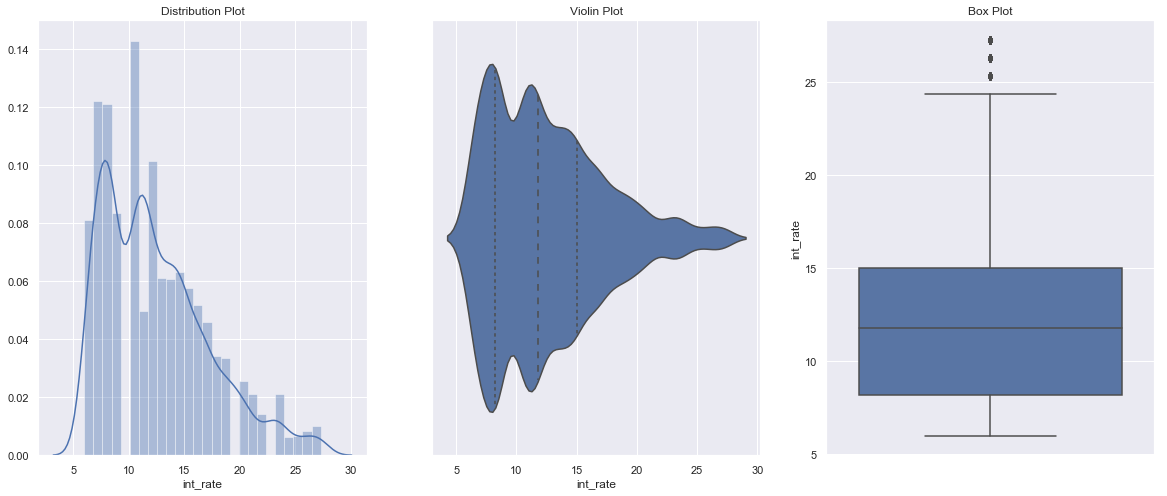

In [51]:
univariate(df=df,col='int_rate',vartype=0)


In [52]:
df["annual_inc"].describe()

count    4.653000e+03
mean     8.512177e+04
std      6.111590e+04
min      0.000000e+00
25%      5.000000e+04
50%      7.000000e+04
75%      1.000000e+05
max      1.120000e+06
Name: annual_inc, dtype: float64

In [53]:
q = df["annual_inc"].quantile(0.995)
df = df[df["annual_inc"] < q]
df["annual_inc"].describe()

count      4629.000000
mean      82776.554130
std       50124.971343
min           0.000000
25%       50000.000000
50%       70000.000000
75%      100000.000000
max      384000.000000
Name: annual_inc, dtype: float64

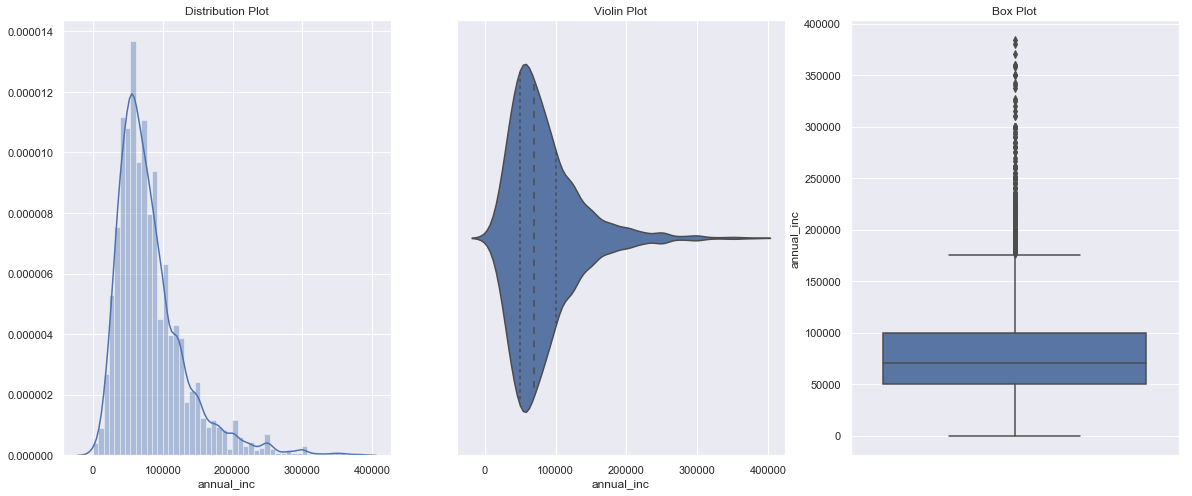

In [54]:
univariate(df=df,col='annual_inc',vartype=0)


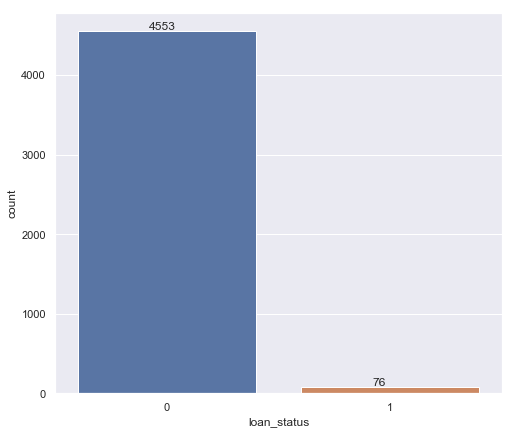

In [55]:
univariate(df=df,col='loan_status',vartype=1)

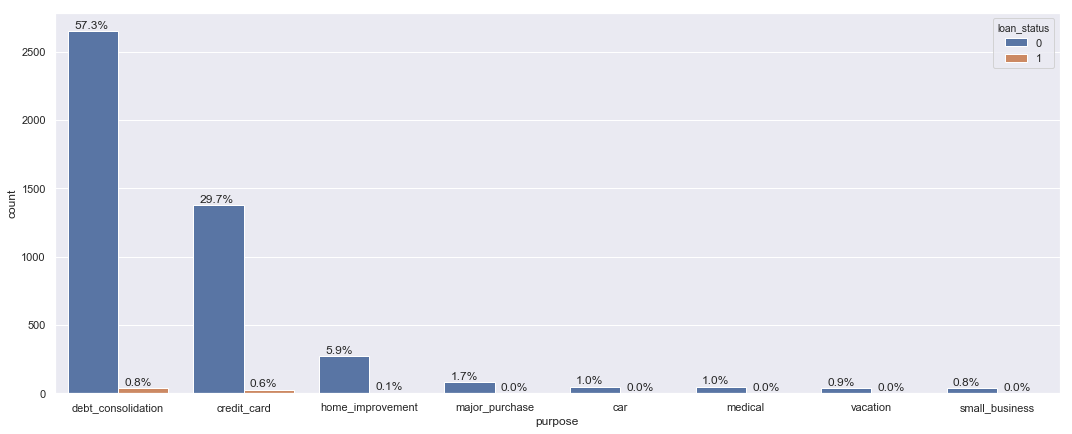

In [56]:
univariate(df=df,col='purpose',vartype=1,hue='loan_status')

In [57]:
df.home_ownership.unique()


array(['RENT', 'MORTGAGE', 'OWN', 'ANY'], dtype=object)

In [58]:
rem = ['OTHER', 'NONE', 'ANY']
df.drop(df[df['home_ownership'].isin(rem)].index,inplace=True)
df.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN'], dtype=object)

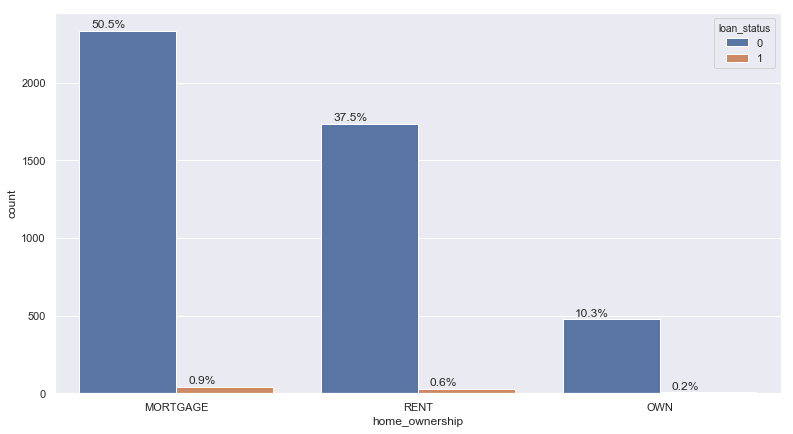

In [59]:
univariate(df=df,col='home_ownership',vartype=1,hue='loan_status')


In [60]:
year_wise =df.groupby(by= [df.issue_d])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'issue_d'

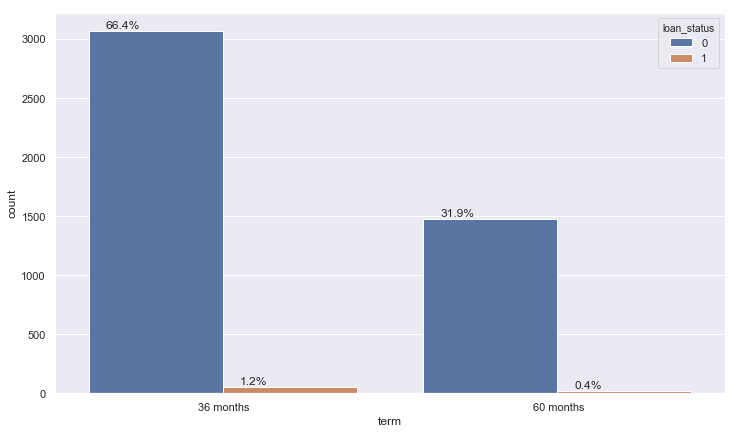

In [61]:
univariate(df=df,col='term',vartype=1,hue='loan_status')


In [62]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,loan_income_ratio,loan_amnt_range,annual_inc_range,int_rate_range
0,2500,2500,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,...,1,60124,16901,36500,18124,Cash,0.045455,0-5000,50000-75000,12.5-15
1,30000,30000,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,1,372872,99468,15000,94072,Cash,0.333333,25000 and above,75000-100000,15 and above
2,5000,5000,5000,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0,136927,11749,13800,10000,Cash,0.084345,0-5000,50000-75000,15 and above


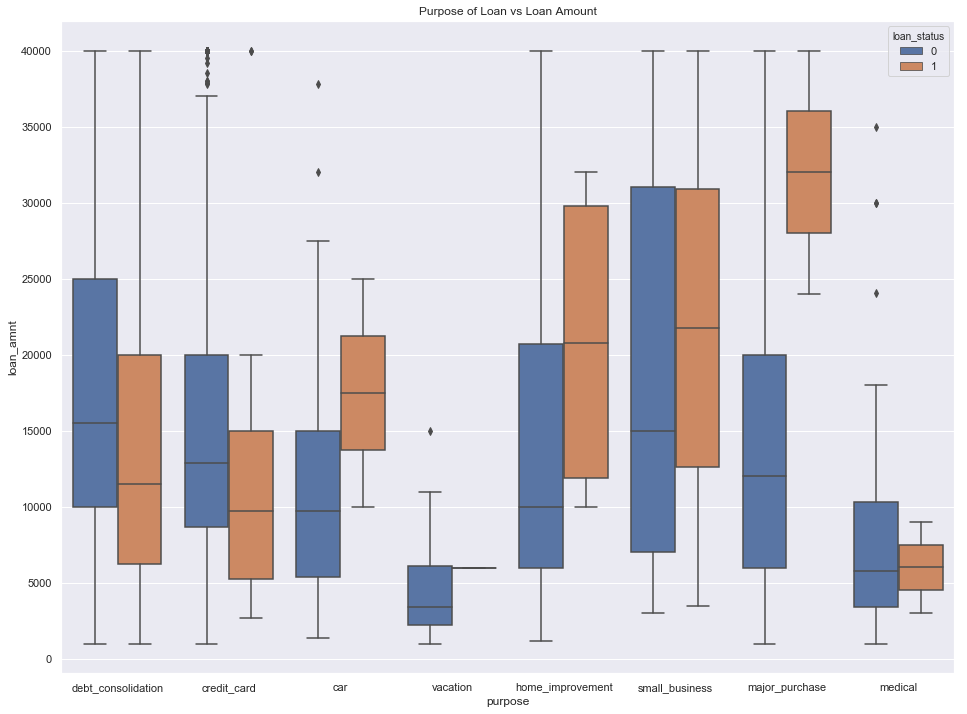

In [63]:
plt.figure(figsize=(16,12))
sns.boxplot(data =df, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

In [64]:
loan_correlation = df.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_income_ratio
loan_amnt,1.000000,1.000000,0.999997,-0.010590,0.936519,0.377230,-0.030934,0.060604,0.001617,-0.065384,...,-0.014688,-0.048368,0.106445,0.060190,-0.063785,0.315999,0.268048,0.353045,0.197626,0.394031
funded_amnt,1.000000,1.000000,0.999997,-0.010590,0.936519,0.377230,-0.030934,0.060604,0.001617,-0.065384,...,-0.014688,-0.048368,0.106445,0.060190,-0.063785,0.315999,0.268048,0.353045,0.197626,0.394031
funded_amnt_inv,0.999997,0.999997,1.000000,-0.010516,0.936507,0.377177,-0.030988,0.060642,0.001638,-0.065397,...,-0.014666,-0.048407,0.106457,0.060222,-0.063796,0.315987,0.268039,0.353024,0.197607,0.394058
int_rate,-0.010590,-0.010590,-0.010516,1.000000,0.032307,-0.102845,0.038547,0.136281,0.094876,0.118672,...,0.049918,0.067928,-0.112843,0.277793,0.016865,-0.117354,0.002242,-0.237906,-0.001220,0.066347
installment,0.936519,0.936519,0.936507,0.032307,1.000000,0.361313,-0.026614,0.065167,0.019680,-0.046983,...,-0.012036,-0.041585,0.082468,0.095691,-0.056769,0.266579,0.246200,0.318487,0.178732,0.375843
annual_inc,0.377230,0.377230,0.377177,-0.102845,0.361313,1.000000,-0.025103,-0.200605,0.064243,0.057280,...,0.013959,0.073006,-0.007403,0.064041,-0.039583,0.528276,0.439244,0.372610,0.390173,-0.278531
loan_status,-0.030934,-0.030934,-0.030988,0.038547,-0.026614,-0.025103,1.000000,-0.023506,-0.003850,0.013613,...,0.012822,0.034398,-0.004083,-0.041125,0.016243,0.000489,-0.008437,-0.002152,-0.005111,-0.016046
dti,0.060604,0.060604,0.060642,0.136281,0.065167,-0.200605,-0.023506,1.000000,-0.023567,-0.010746,...,-0.024946,0.033164,0.061263,0.122648,-0.020502,0.088766,0.231642,0.057351,0.263213,0.469746
delinq_2yrs,0.001617,0.001617,0.001638,0.094876,0.019680,0.064243,-0.003850,-0.023567,1.000000,0.022516,...,0.625753,-0.047081,-0.382449,0.021149,-0.044542,0.047714,0.019287,-0.045644,0.034680,-0.038146
inq_last_6mths,-0.065384,-0.065384,-0.065397,0.118672,-0.046983,0.057280,0.013613,-0.010746,0.022516,1.000000,...,0.010782,0.374644,-0.005327,-0.117490,0.068704,0.042016,0.048807,0.017589,0.068364,-0.076734


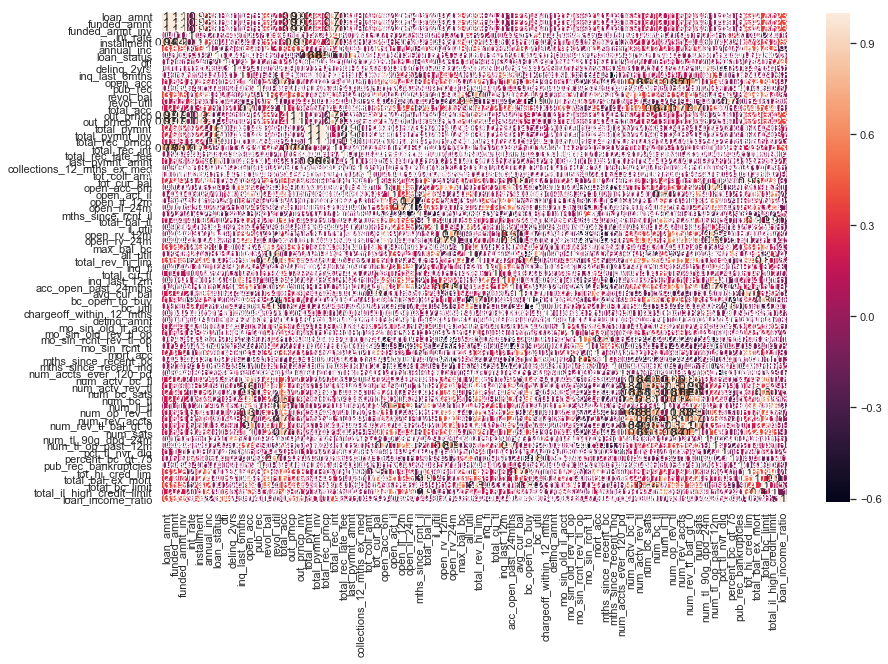

In [65]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

In [66]:
loanstatus=df.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=df.loc[df['loan_status']=='Charged Off']

In [67]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 2160x1296 with 0 Axes>

## Validations/Transformations

In [153]:
#from sklearn.preprocessing import LabelEncoder
#for column in df.columns:
#    if df[column].dtype == type(object):
#        le = LabelEncoder()

In [172]:
features = df.drop(['loan_status'], axis=1)
#dummies = pd.get_dummies(df['home_ownership'])

features = df[['funded_amnt','funded_amnt_inv','loan_income_ratio']]
#features = pd.concat([df,dummies],axis=1)
#dummies = pd.get_dummies(df['annual_inc'])
features.head(2)

# define our target

target = df[['loan_status']]

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [174]:
from sklearn.linear_model import LogisticRegression
y_train.columns

Index(['loan_status'], dtype='object')

In [175]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

# predict
y_train_preds = logisticRegr.predict(X_train)
y_test_preds  = logisticRegr.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Training 

In [158]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test_preds, y_test)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_test_preds))
print("Precision:",metrics.precision_score(y_test, y_test_preds))
print("Recall:",metrics.recall_score(y_test, y_test_preds))

Accuracy: 0.987027027027027
Precision: 0.0
Recall: 0.0


In [159]:
df.loan_status.value_counts()
features

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_bc_limit,total_il_high_credit_limit,disbursement_method,loan_income_ratio,loan_amnt_range,annual_inc_range,int_rate_range,MORTGAGE,OWN,RENT
0,2500,2500,2500,0,13.56,84.92,2,10,Chef,10+ years,...,36500,18124,Cash,0.045455,0-5000,50000-75000,12.5-15,0,0,1
1,30000,30000,30000,1,18.94,777.23,3,16,Postmaster,10+ years,...,15000,94072,Cash,0.333333,25000 and above,75000-100000,15 and above,1,0,0
2,5000,5000,5000,0,17.97,180.69,3,15,Administrative,6 years,...,13800,10000,Cash,0.084345,0-5000,50000-75000,15 and above,1,0,0
3,4000,4000,4000,0,18.94,146.51,3,16,IT Supervisor,10+ years,...,5000,44984,Cash,0.043478,0-5000,75000-100000,15 and above,1,0,0
4,30000,30000,30000,1,16.14,731.78,2,13,Mechanic,10+ years,...,9300,32332,Cash,0.524017,25000 and above,50000-75000,15 and above,1,0,0
5,5550,5550,5550,0,15.02,192.45,2,12,Director COE,10+ years,...,65900,203159,Cash,0.036393,5000-10000,100000 and above,15 and above,1,0,0
6,2000,2000,2000,0,17.97,72.28,3,15,Account Manager,4 years,...,0,0,Cash,0.039216,0-5000,50000-75000,15 and above,0,0,1
7,6000,6000,6000,0,13.56,203.79,2,10,Assistant Director,10+ years,...,33100,61742,DirectPay,0.092308,5000-10000,50000-75000,12.5-15,0,0,1
8,5000,5000,5000,0,17.97,180.69,3,15,Legal Assistant III,10+ years,...,21500,34626,Cash,0.093318,0-5000,50000-75000,15 and above,1,0,0
9,6000,6000,6000,0,14.47,206.44,2,11,NaN,< 1 year,...,98300,89600,Cash,0.020000,5000-10000,100000 and above,12.5-15,0,1,0


## Summary

The loan data set was far too big as there were over 1 million different rows, so I decided to trim it down to a significantly smaller sample size of approximately the first 5000 rows under a new csv file named "loan_5000". I used this method because df.sample(n) would require me to load the entire dataset, which my computer would not be able to easily process. However, as discovered, the confusion matrix predictions ended up with an accuracy of 1.0, a precision of 1.0, and a recall of 1.0, which showed that the sample size was far too small in spite of the otherwise accurate model. 

For the bivariate analysis, I used a correlation matrix an overlaid it with a heatmap in order to find variables that have either a strong direct or inverse proportionality with loan_status, and I then performed algorithms and cleaning techniques with those variables as they were the most important.